# Аналитика в авиакомпании

Цель - понять предпочтения пользователей, покупающих билеты на те или иные направления.

Задача исследования - Произвести выгрузки и подготовку данных авиакомпаний с помощью SQL, проверить гипотезу о различии среднего спроса на билеты во время различных событий. 


### Описание данных

Для анализа получены 2 файла по результатам запросов из данных авиакомпании «F9» 

/datasets/query_1.csv 

    model — модели самолета
    flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
    
/datasets/query_3.csv   

    city — городах
    average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

## План действий
1. импортировать файлы и изучить данные в них;
3. проверить типы данных на корректность;
4. выбрать топ-10 городов по количеству рейсов;
5. построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
6. сделать выводы по каждому из графиков, пояснить результат.

## Знакомство с данными. Изучение общей информации

In [1]:
import matplotlib.pyplot as plt # выгружаем необходимые библиотеки
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import math as mt
from functools import reduce
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import matplotlib as mpl

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #изменение глобальной настройки отображения 

In [3]:
model_flight = pd.read_csv('/datasets/query_1.csv') # датасет с данными о моделях самолетов и колличестве 
#рейсов

In [11]:
print(model_flight.info())
print(model_flight)

#Датасет представлен таблицей из двух столбцов и 8 строк. Пропусков нет. Тип данных подходит для дальнейшего
#анализа.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
                 model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185


In [5]:
city_flights = pd.read_csv('/datasets/query_3.csv') # датасет с данными о городах и среднем колличестве рейсов,
#прибывающих в город за 1 день.

In [12]:
print(city_flights.info())
print(city_flights)
print(city_flights.isnull().sum()) #Датасет представляет собой таблицу с 2 столбцами и 101 строкой. Пропусков 
#не обнаружено.
# столбец average_flights представлен в формате float64. Вещественные числа не поддерживают длинную арифметику 
#и усложняют читаемость. Для корректности анализа, заменим тип на int и округлим данные до целого числа.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB
None
               city  average_flights
0            Абакан                4
1           Анадырь                1
2             Анапа                3
3       Архангельск                6
4         Астрахань                3
..              ...              ...
96             Чита                2
97           Элиста                5
98   Южно-Сахалинск                5
99           Якутск                3
100       Ярославль                2

[101 rows x 2 columns]
city               0
average_flights    0
dtype: int64


In [7]:
city_flights['average_flights'] = np.ceil(city_flights['average_flights']).astype('int')
print(city_flights.info()) # проверка замены

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB
None


### Вывод по блоку "Знакомство с данными"

Данные подготовлены к дальнейшему анализу.

## топ-10 городов по количеству рейсов

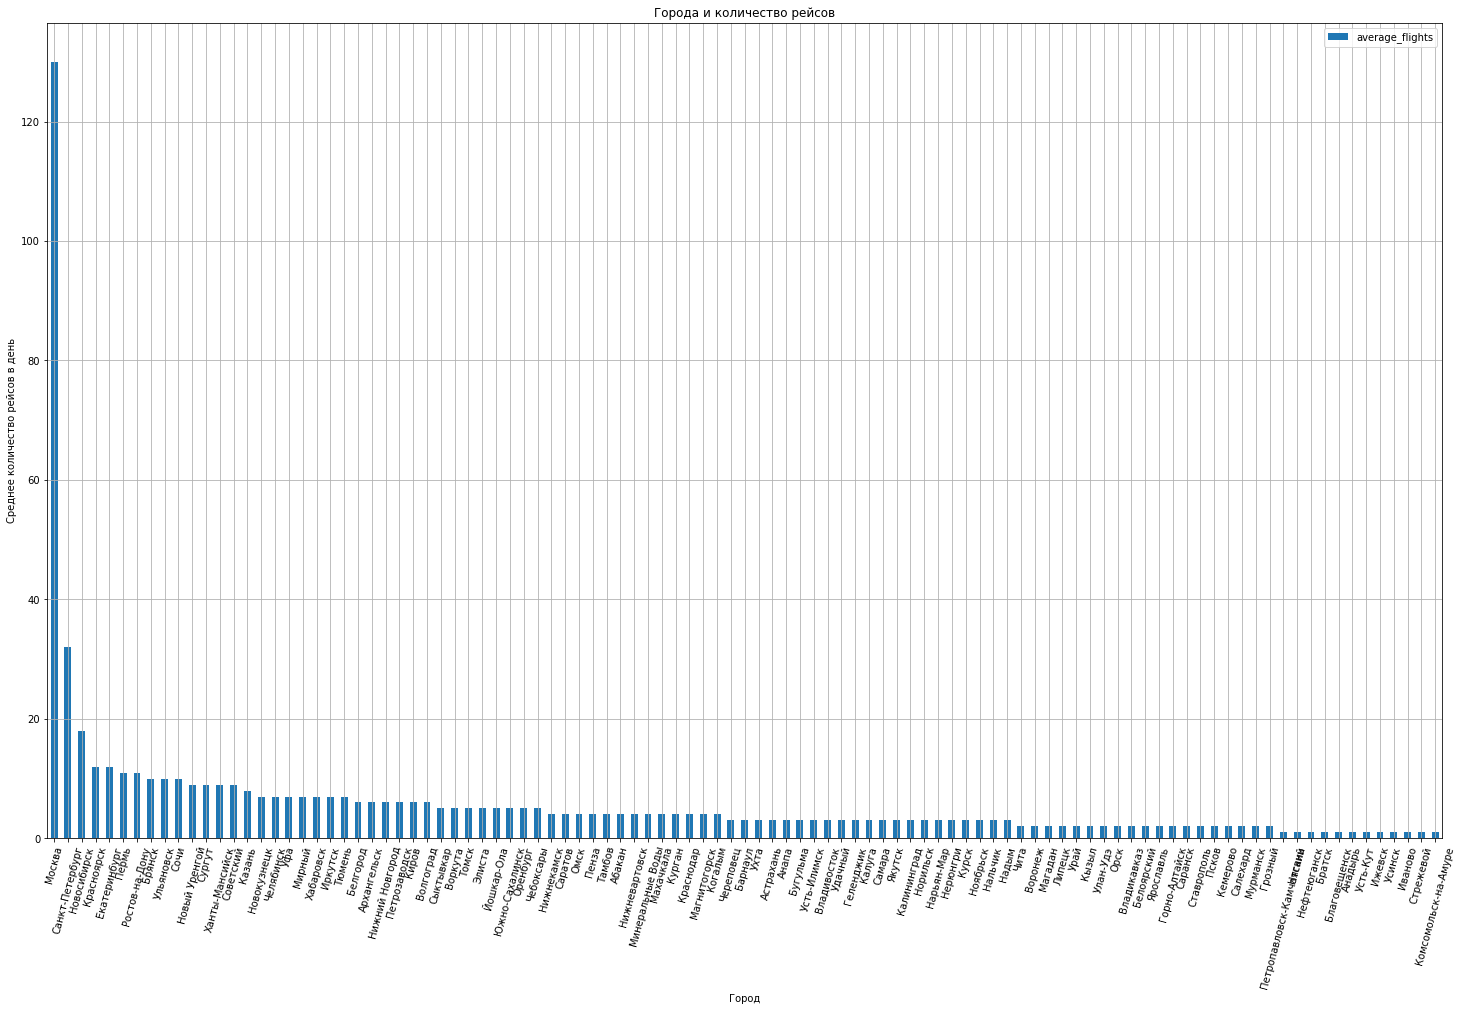

In [27]:
city_flights.sort_values(by='average_flights', ascending = False).\
reset_index(drop = True).\
plot(figsize=(25,15), x='city', y='average_flights', title ='Города и количество рейсов',\
                  kind='bar', grid=True)
plt.xticks(rotation= 75)
plt.ylabel('Среднее количество рейсов в день')
plt.xlabel('Город');

Очевидно, лидером по количеству рейсов в день является Москва. Небольшие города принимают от 1 до 5 рейсов в день. Города по-больше принимают от 10 до 35 рейсов. Определим ТОП-10 городов по колличеству рейсов.

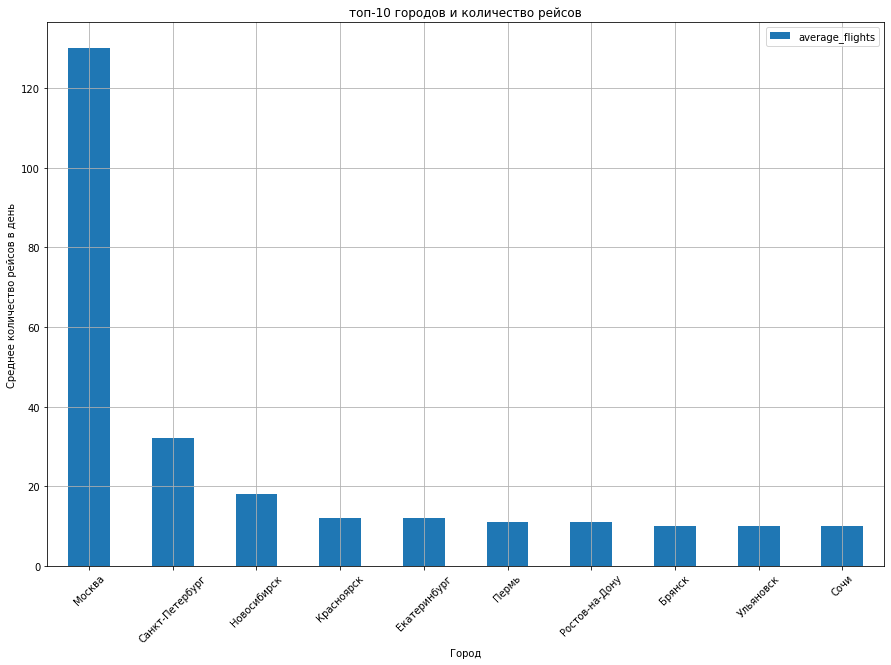

In [28]:
city_flights.sort_values(by='average_flights', ascending = False).\
reset_index(drop = True).\
head(10).\
plot(figsize=(15,10), x='city', y='average_flights', title ='топ-10 городов и количество рейсов',\
     kind='bar', grid=True)
plt.xticks(rotation= 45)
plt.ylabel('Среднее количество рейсов в день')
plt.xlabel('Город');

В ТОП-3 входят Санкт-Петербург и Новосибирск. Вероятно, в данных городах находятся "домашние" базировки. Крупные региональные центры принимают в среднем от 10 рейсов в день.

### Модели самолетов и количество рейсов

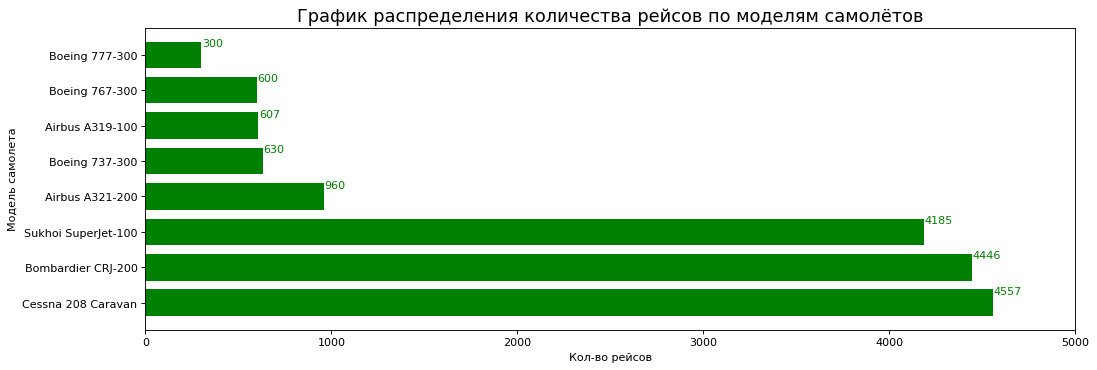

In [10]:
model_flight_sorted = model_flight.sort_values('flights_amount',ascending=False).\
        reset_index()
 
def barh_plot(df, col1, xlimit):
    fig, ax = plt.subplots(figsize=(15,5), facecolor='white', dpi= 80)    
 
    ax.barh(df.index, df['flights_amount'], 0.75, color="g")
    for i, v in enumerate(df['flights_amount']):
        ax.text(v + 3, i + .25, str(v), color='g')
    ax.set_yticks(df.index)
    ax.set_yticklabels(df[col1], minor=False)
    plt.title('График распределения количества рейсов по моделям самолётов', fontdict={'size':16})
    ax.set(xlabel = 'Кол-во рейсов')
    ax.set(ylabel='Модель самолета', xlim=(0, xlimit))
 
barh_plot(model_flight_sorted, 'model', 5000)

Самое большое колличество рейсов осуществляют модели Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100.
Данные самолеты обычно совершают перелеты на коротких расстояниях, имеют высокую скорость и могут совершать до 4 рейсов в день, вероятно поэтому разница с другими дальнемагистральными и широкофюзеляжными моделями значительна.

## Общий вывод

Из предыдущих шагов исследования, можно сделать вывод, что спрос на билеты в дни фестивалей практически не отличается. Тем не менее, из всех рассматриваемых городов - организаторов, менее всех охвачен Ярославль. В среднем, 2 рейса в день. Стоит рассмотреть возможность увеличения количества рейсов накануне проведения фестиваля «О, да! Еда!».
Также, можно сделать вывод о том, что проведение большинства фестивалей, к сожалению, - не самые показательные мероприятия для принятия решения об увеличении рейсов.